# Taller de Análisis de Texto con Tweets en Español

Este taller guía a los estudiantes en el análisis de tweets en español, usando técnicas de limpieza de texto, análisis de frecuencia de palabras y análisis de sentimientos. También incluye preguntas orientadas al negocio.

In [ ]:
!wget https://github.com/javierherrera1996/lecture_analytics/raw/refs/heads/main/datasets/exploracion_datos/Gender_bias_spanish.csv

--2025-11-12 21:32:38--  https://github.com/javierherrera1996/lecture_analytics/raw/refs/heads/main/datasets/exploracion_datos/Gender_bias_spanish.csv
Resolving github.com (github.com)... 140.82.113.3
Connecting to github.com (github.com)|140.82.113.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/javierherrera1996/lecture_analytics/refs/heads/main/datasets/exploracion_datos/Gender_bias_spanish.csv [following]
--2025-11-12 21:32:39--  https://raw.githubusercontent.com/javierherrera1996/lecture_analytics/refs/heads/main/datasets/exploracion_datos/Gender_bias_spanish.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 205292 (200K) [text/plain]
Saving to: ‘Gender_bias_spanish.csv’

Gender_bias_s

## 1. Configuración e Importación de Librerías
Primero, importaremos las librerías necesarias y cargaremos el conjunto de datos.

In [ ]:
!pip install nltk textblob wordcloud
import pandas as pd
import re
from nltk.corpus import stopwords
from textblob import TextBlob
from collections import Counter
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import nltk
nltk.download('stopwords')
stop_words = set(stopwords.words('spanish'))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


### Cargar el Conjunto de Datos
Cargamos el archivo CSV que contiene los tweets y las etiquetas ('biased' o 'non-biased').

In [ ]:
data = pd.read_csv('Gender_bias_spanish.csv')

In [ ]:
data

,Contents,Label
0,@chumeltorres ya cabrón! sin tí se reciben las...,biased
1,¿alguien es tan amable de ir a hacerme la comp...,non-biased
2,"@jenniferduquee hahaha, si está rico, nadamas ...",non-biased
3,@evagelcot donde lo ves!!? es mi programa favo...,non-biased
4,como siempre mi tortilla triunfa mas que otros...,non-biased
...,...,...
1909,"iba a ir a dash pero mis 3 cortadas, mi color ...",non-biased
1910,que pinche chiste tiene estar medio alto si to...,non-biased
1911,si fuera bien idiota. ya hubiera comprado un a...,non-biased
1912,nota mental: no le quieras ayudar a alguien qu...,non-biased


## 2. Exploración de Datos
Exploraremos el conjunto de datos para entender mejor la distribución de etiquetas y las características de los tweets.

Conteo de etiquetas:
 Label
non-biased    1596
biased         318
Name: count, dtype: int64

Proporción de etiquetas:
 Label
non-biased    83.38558
biased        16.61442
Name: proportion, dtype: float64


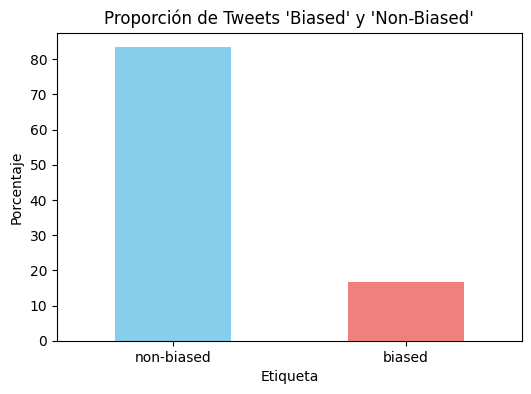

In [17]:
import pandas as pd
data = pd.read_csv('Gender_bias_spanish.csv') # Re-load data to ensure correct state
label_counts = data['Label'].value_counts()
proportion = data['Label'].value_counts(normalize=True) * 100

print("Conteo de etiquetas:\n", label_counts)
print("\nProporción de etiquetas:\n", proportion)

plt.figure(figsize=(6, 4))
proportion.plot(kind='bar', color=['skyblue', 'lightcoral'])
plt.title('Proporción de Tweets \'Biased\' y \'Non-Biased\'')
plt.ylabel('Porcentaje')
plt.xlabel('Etiqueta')
plt.xticks(rotation=0)
plt.show()

**Pregunta:** ¿Qué proporción de tweets son 'biased' y 'non-biased'? ¿Por qué podría ser importante esta proporción para el análisis de texto?

De los tweets analizados, el 83.39% son 'non-biased' y el 16.61% son 'biased'.

Esta proporción es muy importante para el análisis de texto porque indica un desequilibrio significativo en el conjunto de datos. Cuando una categoría (en este caso, 'non-biased') tiene muchos más ejemplos que la otra ('biased'), puede dificultar la construcción de modelos de machine learning precisos, ya que el modelo podría tender a favorecer la categoría mayoritaria y ser menos efectivo para identificar los ejemplos de la categoría minoritaria ('biased'). Esto es un desafío común conocido como desequilibrio de clases, que puede llevar a modelos que parecen tener un buen rendimiento general, pero fallan en detectar la clase de interés (el sesgo) que suele ser menos frecuente.

## 3. Preprocesamiento de Texto
Realizamos una serie de pasos para limpiar y preparar el texto para el análisis: limpieza de caracteres especiales, conversión a minúsculas, y eliminación de stopwords.

In [16]:
def limpiar_texto(texto):
    texto = str(texto).lower() # Convertir a minúsculas y asegurar que es string
    texto = re.sub(r'http\S+|www\S+|https\S+', '', texto, flags=re.MULTILINE) # Eliminar URLs
    texto = re.sub(r'@[A-Za-z0-9_]+', '', texto) # Eliminar menciones de usuario
    texto = re.sub(r'#', '', texto) # Eliminar el símbolo #
    texto = re.sub(r'[^a-zñáéíóúü\s]', '', texto) # Eliminar caracteres especiales, números y puntuación, excepto ñ y vocales acentuadas
    texto = texto.split() # Tokenizar
    texto = [palabra for palabra in texto if palabra not in stop_words] # Eliminar stopwords
    texto = ' '.join(texto) # Unir palabras de nuevo
    return texto

In [18]:
import pandas as pd
data = pd.read_csv('Gender_bias_spanish.csv') # Re-load data to ensure correct state
data['cleaned_text'] = data['Contents'].apply(limpiar_texto)
display(data[['Contents', 'cleaned_text']].head())

,Contents,cleaned_text
0,@chumeltorres ya cabrón! sin tí se reciben las...,cabrón tí reciben noticias colchoncito puro ch...
1,¿alguien es tan amable de ir a hacerme la comp...,alguien tan amable ir hacerme compra mañana ba...
2,"@jenniferduquee hahaha, si está rico, nadamas ...",hahaha si rico nadamas falta presentación
3,@evagelcot donde lo ves!!? es mi programa favo...,ves programa favorito sólo encuentro temporada...
4,como siempre mi tortilla triunfa mas que otros...,siempre tortilla triunfa mas platos playa


## 4. Análisis de Frecuencia de Palabras por Etiqueta
Contamos las palabras en tweets 'biased' y 'non-biased' y visualizamos las palabras más comunes.

Palabras más comunes en tweets 'Biased':
si: 30
mujer: 23
mujeres: 19
ser: 17
así: 16
quiero: 14
q: 14
mejor: 13
mamá: 12
tan: 12
solo: 12
cosas: 10
niñas: 10
casa: 10
sé: 9
chicas: 9
hombres: 9
puta: 8
ahora: 8
mal: 8

Palabras más comunes en tweets 'Non-Biased':
si: 167
gracias: 90
bien: 69
año: 65
quiero: 62
hoy: 62
día: 62
mejor: 62
tan: 59
días: 58
así: 58
ser: 55
ver: 55
vida: 52
pues: 52
feliz: 50
ahora: 47
mal: 46
hacer: 46
solo: 43


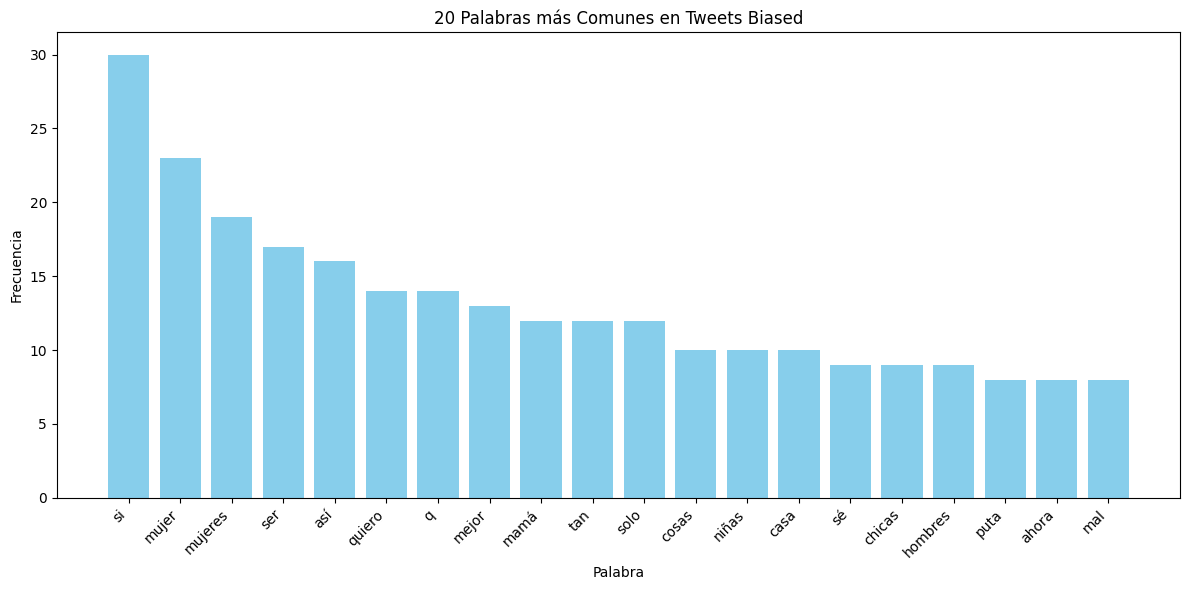

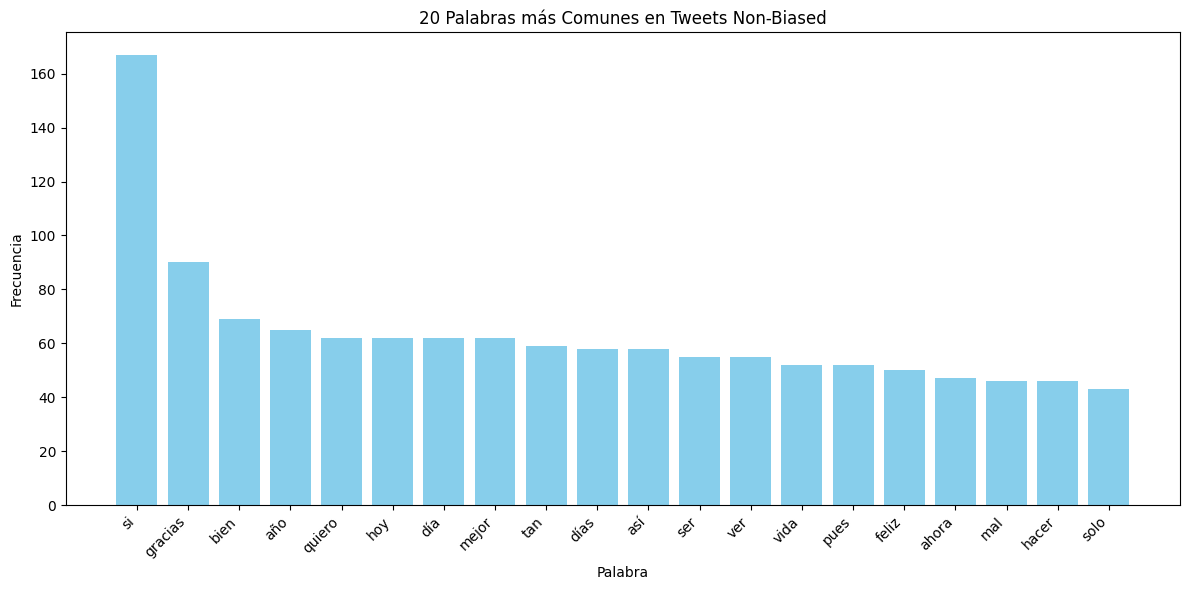

In [19]:
# Separar tweets biased y non-biased
biased_tweets = ' '.join(data[data['Label'] == 'biased']['cleaned_text'])
non_biased_tweets = ' '.join(data[data['Label'] == 'non-biased']['cleaned_text'])

# Contar palabras para biased tweets
biased_word_counts = Counter(biased_tweets.split())
common_biased_words = biased_word_counts.most_common(20)

# Contar palabras para non-biased tweets
non_biased_word_counts = Counter(non_biased_tweets.split())
common_non_biased_words = non_biased_word_counts.most_common(20)

print("Palabras más comunes en tweets 'Biased':")
for word, count in common_biased_words:
    print(f"{word}: {count}")

print("\nPalabras más comunes en tweets 'Non-Biased':")
for word, count in common_non_biased_words:
    print(f"{word}: {count}")

# Visualización de frecuencia de palabras
def plot_word_frequencies(word_counts, title):
    words = [word for word, count in word_counts]
    counts = [count for word, count in word_counts]
    plt.figure(figsize=(12, 6))
    plt.bar(words, counts, color='skyblue')
    plt.title(title)
    plt.xlabel('Palabra')
    plt.ylabel('Frecuencia')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

plot_word_frequencies(common_biased_words, '20 Palabras más Comunes en Tweets Biased')
plot_word_frequencies(common_non_biased_words, '20 Palabras más Comunes en Tweets Non-Biased')

**Preguntas de Análisis de Frecuencia:**
- ¿Qué palabras son más comunes en los tweets 'biased' en comparación con los 'non-biased'?
- ¿Hay palabras que sugieran un sesgo en los tweets etiquetados como 'biased'?
- ¿Cómo podrían usar las empresas esta información para entender mejor las opiniones sesgadas?

1
Palabras más comunes en tweets 'Biased': si, mujer, mujeres, ser, así, quiero, q, mejor, mamá, tan, solo, cosas, niñas, casa, sé, chicas, hombres, puta, ahora, mal.
Palabras más comunes en tweets 'Non-Biased': si, gracias, bien, año, quiero, hoy, día, mejor, tan, días, así, ser, ver, vida, pues, feliz, ahora, mal, hacer, solo.
Se observa que palabras como mujer, mujeres, mamá, niñas, chicas, hombres y puta aparecen con mayor frecuencia en los tweets 'biased'. Mientras que en los 'non-biased' hay palabras más generales y positivas como gracias, bien, año, hoy, día, vida, feliz.

2
Sí, definitivamente. La presencia de términos de género específicos como mujer, mujeres, mamá, niñas, chicas y hombres con una frecuencia alta en los tweets 'biased' sugiere un sesgo relacionado con el género. La palabra puta también es un indicador fuerte de lenguaje sesgado o despectivo presente en esta categoría.

3
Las empresas podrían usar esta información de varias maneras:

Monitoreo y Detección Temprana: Identificar rápidamente temas o palabras clave que activan un sesgo en las conversaciones sobre su marca, productos o industria. Esto permite una reacción proactiva antes de que un tema sesgado se propague.
Ajuste de Estrategias de Comunicación y Marketing: Evitar el uso de palabras, frases o imágenes que puedan ser interpretadas como sesgadas o que refuercen estereotipos. Pueden diseñar mensajes más inclusivos y neutrales que resuenen positivamente con una audiencia diversa.
Formación del Personal: Utilizar estos hallazgos para capacitar a los equipos de marketing, comunicaciones y atención al cliente sobre el lenguaje y los temas sensibles, promoviendo una comunicación más consciente y equitativa.
Análisis Competitivo: Entender cómo se manifiesta el sesgo en el discurso sobre la competencia, lo que puede revelar oportunidades para diferenciarse como una marca más inclusiva o para abordar deficiencias en el sector.
Desarrollo de Productos y Servicios: Si ciertos productos o servicios generan opiniones sesgadas, esta información puede ser crucial para reevaluar su diseño, marketing o el público objetivo al que se dirigen, buscando eliminar posibles sesgos inherentes o percibidos.

## 6. Visualización con Nube de Palabras
Usamos una nube de palabras para visualizar las palabras más comunes en cada conjunto de tweets.

In [20]:
def generar_nube_palabras(texto, titulo):
    wordcloud = WordCloud(width=800, height=400, background_color='white', stopwords=stop_words).generate(texto)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(titulo)
    plt.show()

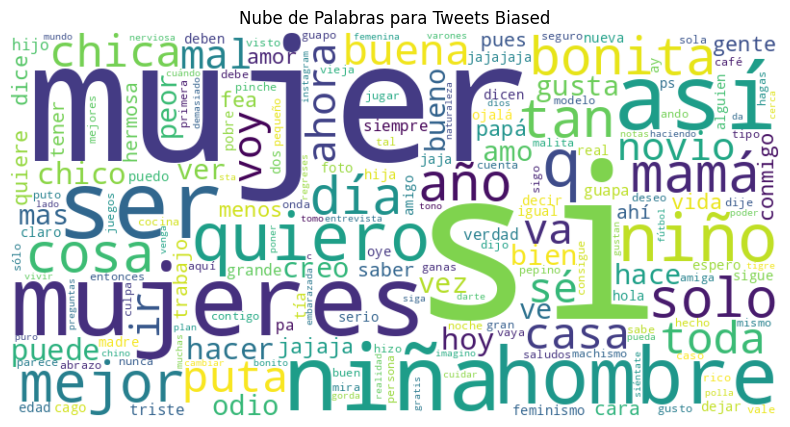

In [21]:
generar_nube_palabras(biased_tweets, 'Nube de Palabras para Tweets Biased')

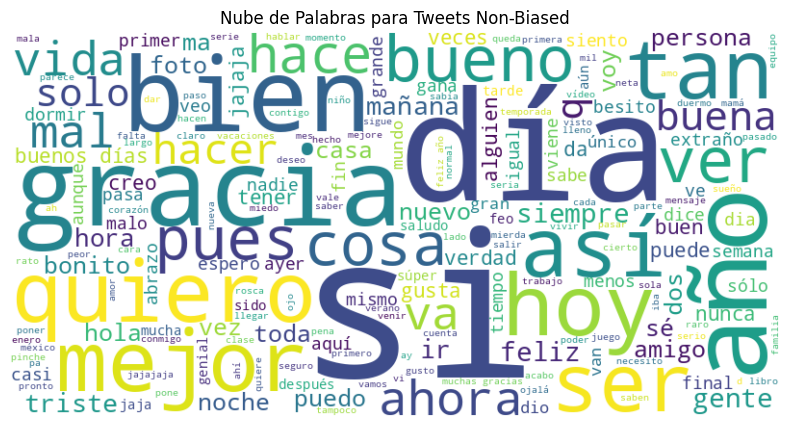

In [22]:
generar_nube_palabras(non_biased_tweets, 'Nube de Palabras para Tweets Non-Biased')

## 7. Conclusiones y Perspectiva de Negocios
En este taller, hemos explorado cómo el análisis de texto puede ofrecer información valiosa sobre el contenido y el sentimiento de los tweets. Reflexionemos sobre algunas preguntas de negocio:
- ¿Cómo podría utilizarse este análisis para mejorar la comunicación de la marca?
- ¿Qué ajustes se podrían hacer en una campaña de marketing si los tweets son predominantemente 'biased'?
- ¿Qué patrones importantes se podrían explorar en un análisis futuro (e.g., análisis de tendencias a lo largo del tiempo)?

## 7. Conclusiones y Perspectiva de Negocios

A partir del análisis realizado sobre los tweets en español, se pueden extraer varias conclusiones relevantes tanto desde el punto de vista analítico como estratégico para una marca o empresa.

**1. Uso del análisis para mejorar la comunicación de marca:**  
El análisis de texto permite identificar el tono, lenguaje y temas más frecuentes en los tweets. Si se detecta una gran cantidad de tweets "biased" (sesgados), la empresa puede ajustar su comunicación para ser más inclusiva, neutral y empática. Esto ayuda a fortalecer la reputación de la marca y a reducir posibles controversias en redes sociales.  
Además, comprender las palabras y expresiones más asociadas a percepciones negativas o sesgadas permite desarrollar mensajes que conecten mejor con diferentes audiencias.

**2. Ajustes en campañas de marketing ante presencia de sesgos:**  
Si el análisis revela que muchos tweets presentan sesgos, podría ser necesario rediseñar las campañas de marketing para evitar reproducir estereotipos de género, culturales o sociales.  
Por ejemplo, se podrían usar mensajes que promuevan la igualdad o que resalten la diversidad. También se pueden usar estas métricas para capacitar al equipo de comunicación y revisar el contenido generado por influencers o publicidad digital antes de su publicación.

**3. Patrones para análisis futuro:**  
En futuras investigaciones se podrían explorar:
- **Evolución temporal del sesgo**, analizando cómo cambian los patrones a lo largo del tiempo (por mes o año).  
- **Análisis de sentimiento combinado**, para relacionar el sesgo con la polaridad (positiva o negativa) de los mensajes.  
- **Detección de temas clave**, mediante técnicas de *topic modeling* para conocer qué temas generan más comentarios sesgados o neutrales.  

En general, este tipo de análisis ofrece una visión profunda del lenguaje usado en redes sociales y puede guiar decisiones estratégicas en comunicación, reputación y marketing digital.
